<a href="https://colab.research.google.com/github/wakii/ds_parrot/blob/master/parraot_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
raw_data = pd.read_excel('titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [0]:
# Survived : 생존여부(1: 생존, 0 : 사망)
# Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
# Name : 승객 이름
# Sex : 승객 성별
# Age : 승객 나이
# SibSp : 동반한 형제자매, 배우자 수
# Parch : 동반한 부모, 자식 수
# Ticket : 티켓의 고유 넘버
# Fare 티켓의 요금
# Cabin : 객실 번호
# Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [0]:
raw_data['sex'] = raw_data['sex'].replace(['female','male'], [0,1])
raw_data[['survived', 'pclass', 'sibsp', 'parch', 'fare']] = raw_data[['survived', 'pclass', 'sibsp', 'parch', 'fare']].apply(pd.to_numeric)
raw_data = raw_data[raw_data['age'] != '']

raw_data.info() # 여러 번 하면 이미 바뀐 상태라 오류

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
raw_data = raw_data[['survived', 'pclass','sex','age','sibsp','parch','fare']].dropna()
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']].dropna()

train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1045 non-null   int64  
 1   sex     1045 non-null   int64  
 2   age     1045 non-null   float64
 3   sibsp   1045 non-null   int64  
 4   parch   1045 non-null   int64  
 5   fare    1045 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.1 KB


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']], test_size=0.2, random_state=13)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3, random_state=13)
tree.fit(x_train, y_train)

train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

predict_y = tree.predict(x_test) # x_train을 넣은 결과가 y_train / x_test를 넣은 결과가 y_test
print('Score1: {}'.format(tree.score(x_train, y_train)))
print('Score2: {}'.format(tree.score(x_test, y_test)))

Score1: 0.8074162679425837
Score2: 0.7799043062200957


In [0]:
#             생존 O | 생존 X
# 생존 O 예측    104     17
# 생존 X 예측    29      59

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_y)

array([[104,  17],
       [ 29,  59]])

In [0]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=0), n_estimators=100, random_state=0).fit(x_train, y_train)

print('Score1: {}'.format(bagging.score(x_train, y_train)))
print('Score2: {}'.format(bagging.score(x_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score1: 0.8241626794258373
Score2: 0.784688995215311


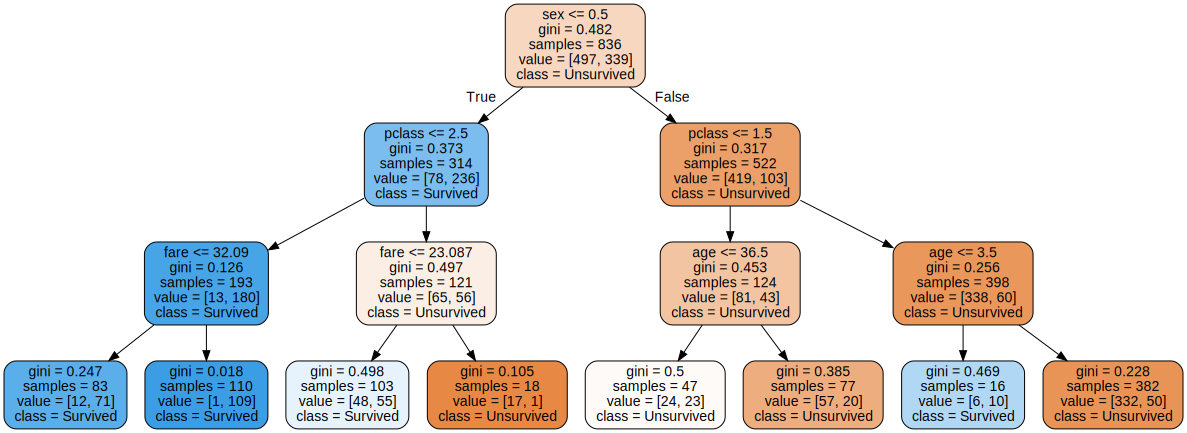

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot